<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Differentiation

**GOAL:**  Given a set of $N+1$ points $(x_i, y_i)$ compute the derivative of a given order to a specified accuracy.

**Approaches:** 
 * Find the interpolating polynomial $P_N(x)$ and differentiate that.
 * Use Taylor-series expansions and the method of undetermined coefficients to derive finite-difference weights and their error estimates
 
**Issues:**  Order vs accuracy...how to choose

# Example 1:  how to approximate the derivative $f'(x)$ given a discrete sampling of a function $f(x)$

Here we will consider how to estimate $f'(x_k)$ given a $N$ point sampling of $f(x)=\sin(\pi x) + 1/2 \sin(2\pi x)$ sampled uniformly over the interval $x\in [ 0,1]$

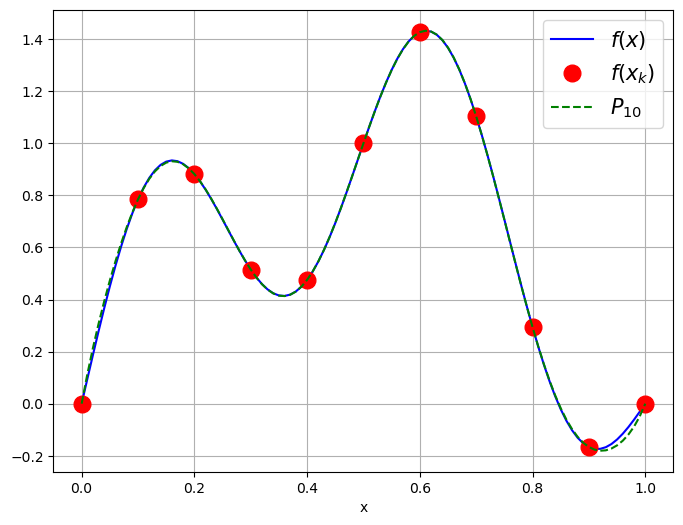

In [2]:
N = 11
x = numpy.linspace(0,1,N)
xfine = numpy.linspace(0,1,101)
f = lambda x:  numpy.sin(numpy.pi*x) + 0.5*numpy.sin(4*numpy.pi*x)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(xfine, f(xfine),'b',label='$f(x)$')
axes.plot(x, f(x), 'ro', markersize=12, label='$f(x_k)$')
axes.grid()
axes.set_xlabel('x')
p = numpy.polyfit(x,f(x),N-1)
axes.plot(xfine,numpy.polyval(p,xfine),'g--',label='$P_{{{N}}}$'.format(N=N-1))
axes.legend(fontsize=15)
plt.show()

### Example 2:  how to approximate derivative $f'(x)$ given a discrete sampling of a function $f(x)$

Here we will consider how to estimate $f'(x_k)$ given a $N$ point sampling of Runge's function sampled uniformly over the interval $x\in [ -1,1]$

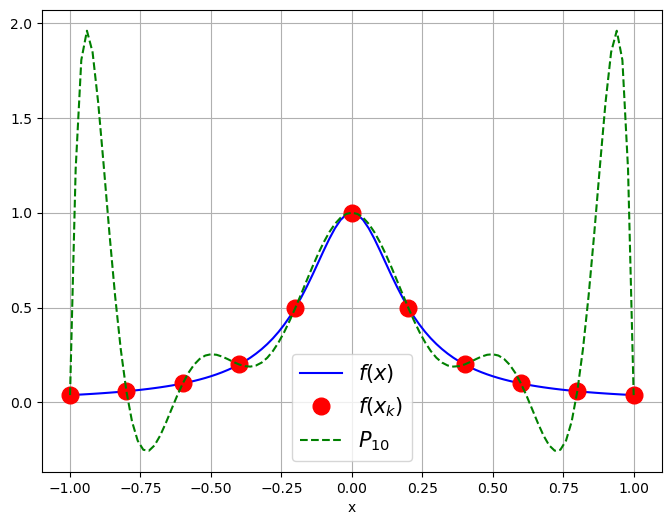

In [3]:
N = 11
x = numpy.linspace(-1,1,N)
xfine = numpy.linspace(-1,1,101)
f = lambda x:  1./(1. + 25*x**2)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(xfine, f(xfine),'b',label='$f(x)$')
axes.plot(x, f(x), 'ro', markersize=12, label='$f(x_k)$')
axes.grid()
axes.set_xlabel('x')
p = numpy.polyfit(x,f(x),N-1)
axes.plot(xfine,numpy.polyval(p,xfine),'g--',label='$P_{{{N}}}$'.format(N=N-1))
axes.legend(fontsize=15)
plt.show()

### The interpolating polynomial: review

From our previous lecture, we showed that we can approximate a function $f(x)$ over some interval in terms of a unique interpolating polynomial through $N+1$ points and a  remainder term

$$
    f(x) = P_N(x) + R_N(x)
$$

Where the Lagrange remainder term is

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N}) \frac{f^{(N+1)}(c)}{(N+1)!}$$

While there are multiple ways to represent the interpolating polynomial, both $P_N(x)$ and $R_N(x)$ are polynomials in $x$ and therefore differentiable.  Thus we should be able to calculate the first derivative and its error as

$$
    f'(x) = P'_N(x) + R'_N(x)
$$

and likewise for higher order derivatives up to degree $N$.

### Derivatives of the Lagrange Polynomials 

The Lagrange basis, is a particularly nice basis for calculating numerical differentiation formulas because of their basic interpolating property that

$$
    P_N(x) = \sum_{i=0}^N f(x_i)\ell_i(x)
$$

where $f(x_i)$ is just the value of our function $f$ at node $x_i$ and all of the $x$ dependence is contained in the Lagrange Polynomials $\ell_i(x)$ (which only depend on the node coordinates $x_i$, $i=0,\ldots,N$).  Thus, the interpolating polynomial at any $x$ is simply a linear combination of the values at the nodes $f(x_i)$

Likewise its first derivative
$$
P'_N(x)  = \sum_{i=0}^N f(x_i)\ell'_i(x)
$$
is also just a linear combination of the values $f(x_i)$

## Examples

Given the potentially, highly oscillatory nature of the interpolating polynomial, in practice we only use a small number of data points around a given point $x_k$ to derive a differentiation formula for the derivative $f'(x_k)$.  In the context of differential equations we also often have $f(x)$ so that $f(x_k) = y_k$ and we can approximate the derivative of a known function $f(x)$.

In [4]:
N = 9
f = lambda x:  1./(1. + 25*x**2)
#f = lambda x: numpy.cos(2.*numpy.pi*x)

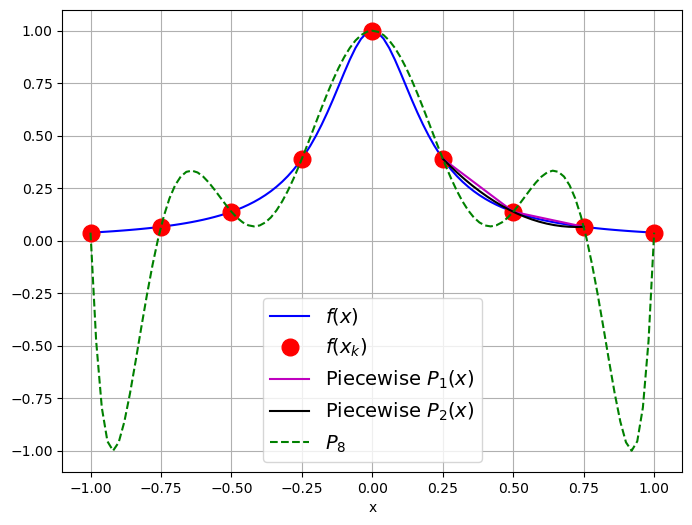

In [5]:
x = numpy.linspace(-1,1,N)
xfine = numpy.linspace(-1,1,101)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(xfine, f(xfine),'b',label='$f(x)$')
axes.plot(x, f(x), 'ro', markersize=12, label='$f(x_k)$')
x3 = x[5:8]
x3fine = numpy.linspace(x3[0],x3[-1],20)
p = numpy.polyfit(x3,f(x3),2)
axes.plot(x3,f(x3),'m',label = 'Piecewise $P_1(x)$')
axes.plot(x3fine,numpy.polyval(p,x3fine),'k',label = 'Piecewise $P_2(x)$')
axes.grid()
axes.set_xlabel('x')
p = numpy.polyfit(x,f(x),N-1)
axes.plot(xfine,numpy.polyval(p,xfine),'g--',label='$P_{{{N}}}$'.format(N=N-1))
axes.legend(fontsize=14,loc='best')
plt.show()

### Example: 1st order polynomial through 2 points $x=x_0, x_1$:


$$
    P_1(x)=f_0\ell_0(x) + f_1\ell_1(x)
$$

Or written out in full

$$
P_1(x) = f_0\frac{x-x_1}{x_0-x_1} + f_1\frac{x-x_0}{x_1-x_0} 
$$


Thus the first derivative of this polynomial for all $x\in[x_0,x_1]$ is

$$
P'_1(x) = \frac{f_0}{x_0-x_1} + \frac{f_1}{x_1-x_0} = \frac{f_1 - f_0}{x_1 - x_0} = \frac{f_1 - f_0}{\Delta x}
$$

Where $\Delta x$ is the width of the interval.  This formula is simply the slope of the chord connecting the points $(x_0, f_0)$ and $(x_1,f_1)$.   Note also, that the estimate of the first-derivative is constant for all $x\in[x_0,x_1]$.

#### "Forward" and "Backward" first derivatives

Even though the first derivative by this method is the same at both $x_0$ and $x_1$, we sometime make a distinction between the "forward Derivative"

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

and the "backward" finite-difference as

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$



Note these approximations should be familiar to use as the limit as $\Delta x \rightarrow 0$ these are no longer approximations but equivalent definitions of the derivative at $x_n$.

### Example: 2nd order polynomial through 3 points $x=x_0, x_1, x_2$:


$$
    P_2(x)=f_0\ell_0(x) + f_1\ell_1(x) + f_2\ell_2(x)
$$

Or written out in full

$$
P_2(x) = f_0\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f_1\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f_2\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
$$


Thus the first derivative of this polynomial for all $x\in[x_0,x_2]$ is

$$
P'_2(x) = f_0\frac{(x-x_1)+(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f_1\frac{(x-x_0)+(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f_2\frac{(x-x_0)+(x-x_1)}{(x_2-x_0)(x_2-x_1)}
$$



**Exercise**: show that the second-derivative $P''_2(x)$ is a constant (find it!) but is also just a linear combination of the function values at the nodes.

### Special case of equally spaced nodes $x = [-h, 0, h]$ where $h=\Delta x$ is the grid spacing


General Case:
$$
P'_2(x) = f_0\frac{(x-x_1)+(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f_1\frac{(x-x_0)+(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f_2\frac{(x-x_0)+(x-x_1)}{(x_2-x_0)(x_2-x_1)}
$$

Becomes:
$$
P'_2(x) = f_0\frac{2x-h}{2h^2} + f_1\frac{-2x}{h^2} + f_2\frac{2x+h}{2h^2}
$$

which if we evaluate at the three nodes  $-h,0,h$ yields

$$
P'_2(-h) = \frac{-3f_0 + 4f_1 -1f_2}{2h}, \quad\quad P'_2(0) = \frac{-f_0 + f_2}{2h}, \quad\quad P'_2(h) = \frac{f_0 -4f_1 + 3f_2}{2h} 
$$

Again, just  linear combinations of the values at the nodes $f(x_i)$

#### Quick Checks

In general,  all finite difference formulas can be written as linear combinations of the values of $f(x)$ at the nodes.  The formula's can be hard to remember, but they are easy to check.

* The sum of the coefficients must add to zero.  Why?
* The sign of the coefficients can be checked by inserting $f(x_i) = x_i$

##### Example

Given 
$$
P'_2(-h) =\frac{-3f_0 + 4f_1 -1f_2}{2h}
$$

What is $P'_2(-h)$ if

* $$f_0=f_1=f_2$$
* $$f_0 = 0, ~f_1 = 1, ~f_2 = 2$$ 

### Error Analysis

In addition to calculating finite difference formulas, we can also estimate the error

From Lagrange's Theorem,  the remainder term looks like

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Thus the derivative of the remainder term $R_N(x)$ is

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f^{(N+1)}(c)}{(N+1)!}$$

The remainder term contains a sum of $N$'th order polynomials and can be awkward to evaluate, however, if we restrict ourselves to the error at any given node $x_k$, the remainder simplifies to 

$$R_N'(x_k) = \left( \prod^{N}_{j=0,~j\neq k} (x_k - x_j) \right) \frac{f^{(N+1)}(c)}{(N+1)!}$$

If we let $\Delta x = \max_i |x_k - x_i|$ we then know that the remainder term will be $\mathcal{O}(\Delta x^N)$ as $\Delta x \rightarrow 0$ thus showing that this approach converges and we can find arbitrarily high order approximations (ignoring floating point error).

### Examples

#### First order differences $N=1$

For our first order finite differences, the error term is simply

$$R_1'(x_0) = -\Delta x \frac{f''(c)}{2}$$
$$R_1'(x_1) = \Delta x \frac{f''(c)}{2}$$

Both of which are $O(\Delta x f'')$

#### Second order differences $N=2$


For general second order polynomial interpolation, the derivative of the remainder term is

$$\begin{aligned}
    R_2'(x) &= \left(\sum^{2}_{i=0} \left( \prod^{2}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f'''(c)}{3!} \\
    &= \left ( (x - x_{i+1}) (x - x_{i-1}) + (x-x_i) (x-x_{i-1}) + (x-x_i)(x-x_{i+1}) \right ) \frac{f'''(c)}{3!}
\end{aligned}$$

Again evaluating this expression at the center point $x = x_i$ and assuming evenly space points we have

$$R_2'(x_i) = -\Delta x^2 \frac{f'''(c)}{3!}$$

showing that our error is $\mathcal{O}(\Delta x^2)$.

### <font color='red'>Caution</font>

High order does not necessarily imply high-accuracy! 

As always, the question remains as to whether the underlying function is well approximated by a high-order polynomial.


### Convergence 

Nevertheless, we can always check to see if the error reduces as expected as $\Delta x\rightarrow 0$.  Here we estimate the 1st and 2nd order first-derivative for evenly spaced points

In [6]:
def D1_p(func, x_min, x_max, N):
    """ calculate consistent 1st order Forward difference of a function func(x) defined on the interval [x_min,xmax]
    and sampled at N evenly spaced points"""

    x = numpy.linspace(x_min, x_max, N)
    f = func(x)
    dx = x[1] - x[0]
    f_prime = numpy.zeros(N)
    f_prime[0:-1] = (f[1:] - f[0:-1])/dx
    # and patch up the end point with a backwards difference
    f_prime[-1] = f_prime[-2]

    return f_prime

def D1_2(func, x_min, x_max, N):
    """ calculate consistent 2nd order first derivative of a function func(x) defined on the interval [x_min,xmax]
    and sampled at N evenly spaced points"""

    x = numpy.linspace(x_min, x_max, N)
    f = func(x)
    dx = x[1] - x[0]
    f_prime = numpy.zeros(N)
    # consistent 2nd order one-sided 1st derivative at x_min
    f_prime[0] = f[:3].dot(numpy.array([-3, 4, -1]))/(2*dx)
    
    # centered derivatives in the interior
    f_prime[1:-1] = (f[2:N] - f[0:-2])/(2*dx)
    
    # consistent 2nd order one-sided 1st derivative at x_min
    f_prime[-1] = f[-3:].dot(numpy.array([1, -4, 3]))/(2*dx)
    
    return f_prime

#### Note:  

This first derivative operator can also be written as a Matrix $D$ such that $f'(\mathbf{x}) = Df(\mathbf{x})$ where $\mathbf{x}$ is a vector of $x$ coordinates. (exercise left for the homework)

In [7]:
N = 81
xmin = 0.
xmax = 1.
func = lambda x:  numpy.sin(numpy.pi*x) + 0.5*numpy.sin(4*numpy.pi*x)
func_prime = lambda x: numpy.pi*numpy.cos(numpy.pi*x) + 2.*numpy.pi * numpy.cos(4*numpy.pi*x)
D1f = D1_p(func, xmin, xmax, N)
D2f = D1_2(func, xmin, xmax, N)

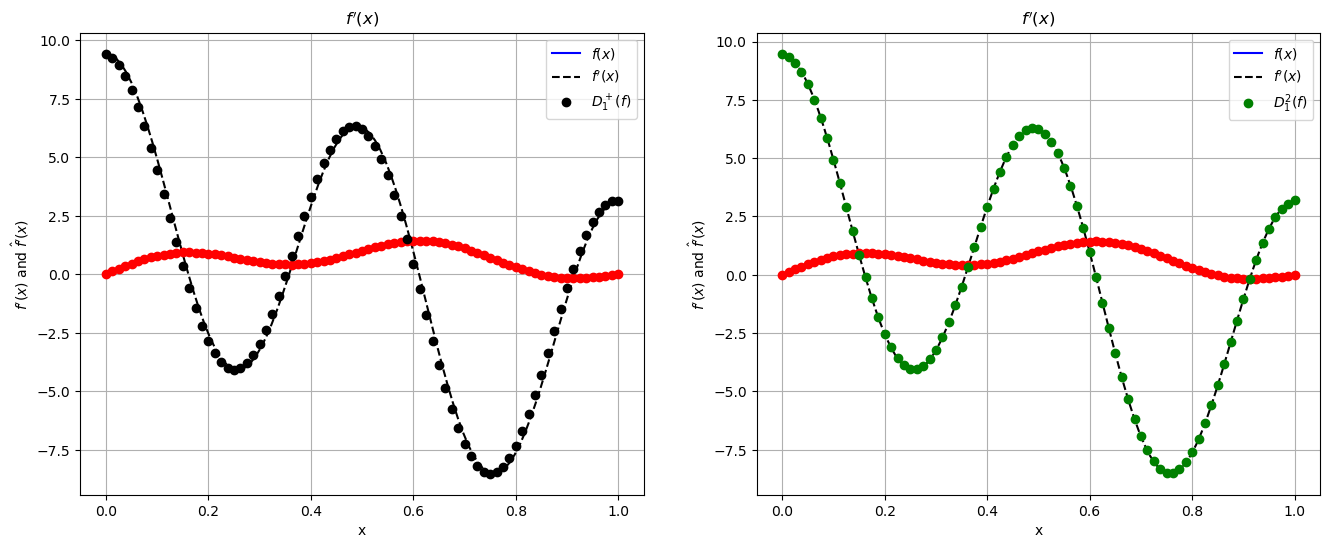

In [8]:
xa = numpy.linspace(xmin, xmax, 100)
xi = numpy.linspace(xmin, xmax, N)
fig = plt.figure(figsize=(16, 6))
axes = fig.add_subplot(1, 2, 1)
axes.plot(xa, func(xa), 'b', label="$f(x)$")
axes.plot(xa, func_prime(xa), 'k--', label="$f'(x)$")
axes.plot(xi, func(xi), 'ro')
axes.plot(xi, D1f, 'ko',label='$D^+_1(f)$')
axes.legend(loc='best')
axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")
axes.grid()

axes = fig.add_subplot(1, 2, 2)
axes.plot(xa, func(xa), 'b', label="$f(x)$")
axes.plot(xa, func_prime(xa), 'k--', label="$f'(x)$")
axes.plot(xi, func(xi), 'ro')
axes.plot(xi, D2f, 'go',label='$D_1^2(f)$')
axes.legend(loc='best')
axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")
axes.grid()
plt.show()

In [9]:
N = 81
xmin = -1
xmax = 1.
func = lambda x:  1./(1 + 25.*x**2)
func_prime = lambda x: -50. * x / (1. + 25.*x**2)**2
D1f = D1_p(func, xmin, xmax, N)
D2f = D1_2(func, xmin, xmax, N)

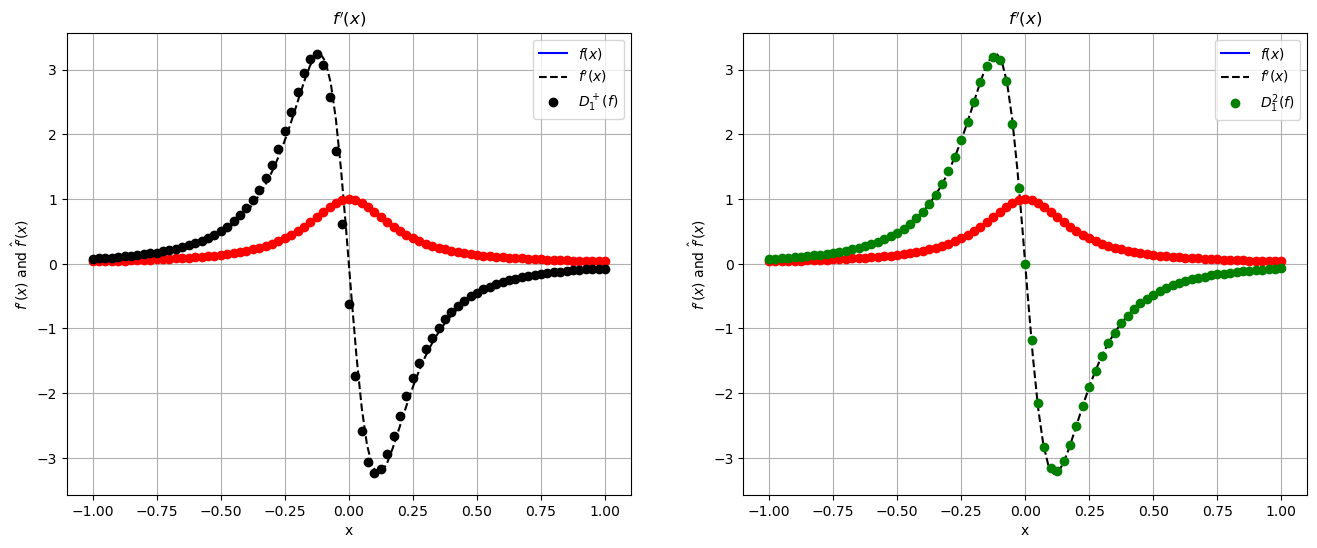

In [10]:
xa = numpy.linspace(xmin, xmax, 100)
xi = numpy.linspace(xmin, xmax, N)
fig = plt.figure(figsize=(16, 6))
axes = fig.add_subplot(1, 2, 1)
axes.plot(xa, func(xa), 'b', label="$f(x)$")
axes.plot(xa, func_prime(xa), 'k--', label="$f'(x)$")
axes.plot(xi, func(xi), 'ro')
axes.plot(xi, D1f, 'ko',label='$D^+_1(f)$')
axes.legend(loc='best')
axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")
axes.grid()

axes = fig.add_subplot(1, 2, 2)
axes.plot(xa, func(xa), 'b', label="$f(x)$")
axes.plot(xa, func_prime(xa), 'k--', label="$f'(x)$")
axes.plot(xi, func(xi), 'ro')
axes.plot(xi, D2f, 'go',label='$D_1^2(f)$')
axes.legend(loc='best')
axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")
axes.grid()
plt.show()

#### Computing Order of Convergence

Say we had the error $E(\Delta x)$ and we wanted to make a statement about the rate of convergence (note we can replace $E$ here with the $R$ from above).  Then we can do the following:
$$\begin{aligned}
    E(\Delta x) &= C \Delta x^n \\
    \log E(\Delta x) &= \log C + n \log \Delta x
\end{aligned}$$

The slope of the line is $n$ when modeling the error like this!  We can also match the first point by solving for $C$:

$$
    C = e^{\log E(\Delta x) - n \log \Delta x}
$$

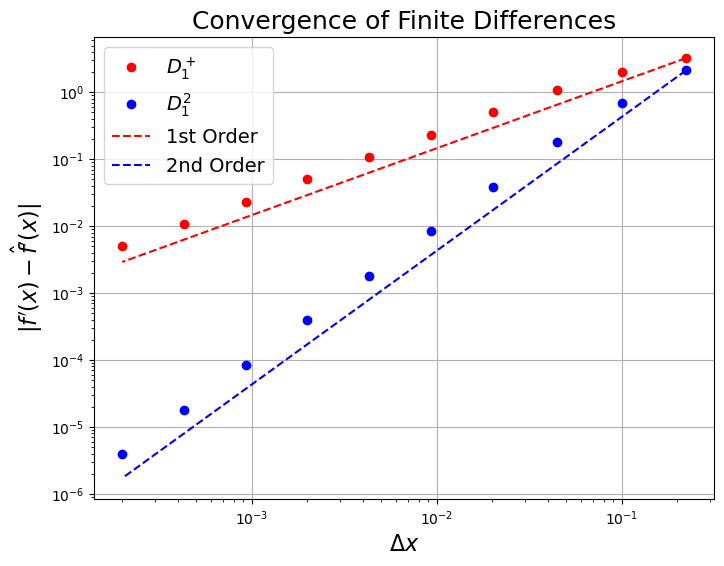

In [11]:
# Compute the error as a function of delta_x
N_range = numpy.logspace(1, 4, 10, dtype=int)
delta_x = numpy.empty(N_range.shape)
error = numpy.empty((N_range.shape[0], 4))
for (i, N) in enumerate(N_range):
    x_hat = numpy.linspace(xmin, xmax, N)
    delta_x[i] = x_hat[1] - x_hat[0]

    # Compute forward difference
    D1f = D1_p(func, xmin, xmax, N)
    
    # Compute 2nd order difference
    D2f = D1_2(func, xmin, xmax, N)

    
    # Calculate the infinity norm or maximum error
    error[i, 0] = numpy.linalg.norm(numpy.abs(func_prime(x_hat) - D1f), ord=numpy.inf)
    error[i, 1] = numpy.linalg.norm(numpy.abs(func_prime(x_hat) - D2f), ord=numpy.inf)
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
  
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.loglog(delta_x, error[:,0], 'ro', label='$D_1^+$')
axes.loglog(delta_x, error[:,1], 'bo', label='$D_1^2$')
axes.loglog(delta_x, order_C(delta_x[0], error[0, 0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0, 1], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of Finite Differences", fontsize=18)
axes.set_xlabel("$\Delta x$", fontsize=16)
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$", fontsize=16)
axes.legend(loc='best', fontsize=14)
axes.grid()

plt.show()

# Another approach:  The method of undetermined Coefficients

An alternative method for finding finite-difference formulas is by using Taylor series expansions about the point we want to approximate.  The Taylor series about $x_n$ is

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Say we want to derive the second order accurate, first derivative approximation that we just did, this requires the values $(x_{n+1}, f(x_{n+1})$ and $(x_{n-1}, f(x_{n-1})$.  We can express these values via our Taylor series approximation above as

\begin{aligned}
    f(x_{n+1}) &= f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
\end{aligned}

or
\begin{aligned}
&= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}

and

\begin{align}
f(x_{n-1}) &= f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) 
\end{align}

\begin{align} 
&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Or all together (for regularly spaced points),
\begin{align} 
f(x_{n+1}) &= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\\
f(x_n) &= f(x_n) \\
f(x_{n-1})&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Now to find out how to combine these into an expression for the derivative we assume our approximation looks like

$$
    f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})
$$

where $R(x_n)$ is our error, and $A,B,C$ are our ``undetermined coefficients''

Plugging in the Taylor series approximations we find

$$\begin{aligned}
    f'(x_n) + R(x_n) &= A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & + B  ~~~~f(x_n)  \\ 
    & + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )
\end{aligned}$$

Or
$$
f'(x_n) + R(x_n)= (A + B + C) f(x_n) + (A\Delta x +0B - C\Delta x)f'(x_n) + (A\frac{\Delta x^2}{2!} + C\frac{\Delta x^2}{2!})f''(x_n) + O(\Delta x^3)
$$

Since we want $R(x_n) = \mathcal{O}(\Delta x^2)$ we want all terms lower than this to cancel except for those multiplying $f'(x_n)$ as those should sum to 1 to give us our approximation.  Collecting the terms with common evaluations of the derivatives on $f(x_n)$ we get a series of expressions for the coefficients $A$, $B$, and $C$ based on the fact we want an approximation to $f'(x_n)$.  The $n=0$ terms collected are $A + B + C$ and are set to 0 as we want the $f(x_n)$ term to also cancel.

$$\begin{aligned}
    f(x_n):&  &A + B + C &= 0 \\
    f'(x_n): & &A \Delta x - C \Delta x &= 1 \\
    f''(x_n): & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

Or as a linear algebra problem

$$\begin{bmatrix}
1 & 1 & 1 \\
\Delta x & 0 &-\Delta x \\
\frac{\Delta x^2}{2} & 0 & \frac{\Delta x^2}{2} \\
\end{bmatrix}
\begin{bmatrix} A \\ B\\ C\\\end{bmatrix} =
\begin{bmatrix} 0 \\ 1\\ 0\\\end{bmatrix} 
$$

This last equation $\Rightarrow A = -C$, using this in the second equation gives $A = \frac{1}{2 \Delta x}$ and $C = -\frac{1}{2 \Delta x}$.  The first equation then leads to $B = 0$.  

Putting this altogether then gives us our previous expression including an estimate for the error:

$$\begin{aligned}
    f'(x_n) + R(x_n) &= \quad \frac{1}{2 \Delta x} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & \quad + 0 \cdot f(x_n) \\ 
    & \quad - \frac{1}{2 \Delta x} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right ) \\
    &=  f'(x_n) + \frac{1}{2 \Delta x} \left ( \frac{2 \Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right )
\end{aligned}$$
so that we find
$$
    R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)
$$

#### Another way...

There is one more way to derive the second order accurate, first order finite-difference formula.  Consider the two first order forward and backward finite-differences averaged together:

$$\frac{D_1^+(f(x_n)) + D_1^-(f(x_n))}{2} = \frac{f(x_{n+1}) - f(x_n) + f(x_n) - f(x_{n-1})}{2 \Delta x} = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

### Example 4: Higher Order Derivatives

Using our Taylor series approach lets derive the second order accurate second derivative formula.  Again we will use the same points and the Taylor series centered at $x = x_n$ so we end up with the same expression as before:

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad B \cdot f(x_n) \\
    &+ \quad C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$

except this time we want to leave $f''(x_n)$ on the right hand side.  

Try out the same trick as before and see if you can setup the equations that need to be solved.

Doing the same trick as before we have the following expressions:

$$\begin{aligned}
    f(x_n): & & A + B + C &= 0\\
    f'(x_n): & & A \Delta x - C \Delta x &= 0\\
    f''(x_n): & & A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 1
\end{aligned}$$

Or again

$$\begin{bmatrix}
1 & 1 & 1 \\
\Delta x & 0 &-\Delta x \\
\frac{\Delta x^2}{2} & 0 & \frac{\Delta x^2}{2} \\
\end{bmatrix}
\begin{bmatrix} A \\ B\\ C\\\end{bmatrix} =
\begin{bmatrix} 0 \\ 0\\ 1\\\end{bmatrix} 
$$

Note,  the Matrix remains, the same, only the right hand side has changed

The second equation implies $A = C$ which combined with the third implies

$$A = C = \frac{1}{\Delta x^2}$$

Finally the first equation gives

$$B = -\frac{2}{\Delta x^2}$$

leading to the final expression

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad \frac{1}{\Delta x^2} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad -\frac{2}{\Delta x^2} \cdot f(x_n) \\
    &+ \quad \frac{1}{\Delta x^2} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right ) \\
    &= f''(x_n) + \frac{1}{\Delta x^2} \left(\frac{2 \Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}
$$
so that

$$
    R(x_n) = \frac{\Delta x^2}{12} f^{(4)}(x_n) + \mathcal{O}(\Delta x^3)
$$

In [12]:
def D2(func, x_min, x_max, N):
    """ calculate consistent 2nd order second derivative of a function func(x) defined on the interval [x_min,xmax]
    and sampled at N evenly spaced points"""

    x = numpy.linspace(x_min, x_max, N)
    f = func(x)
    dx = x[1] - x[0]
    D2f = numpy.zeros(x.shape) 
    D2f[1:-1] = (f[:-2] - 2*f[1:-1] + f[2:])/(dx**2)
    # patch up end points to be 1 sided 2nd derivatives
    D2f[0] = D2f[1]
    D2f[-1] = D2f[-2]

    
    return D2f

In [13]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 80
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] -  x_hat[0]

# Compute derivative
D2f  = D2(f, x_hat[0], x_hat[-1], N)

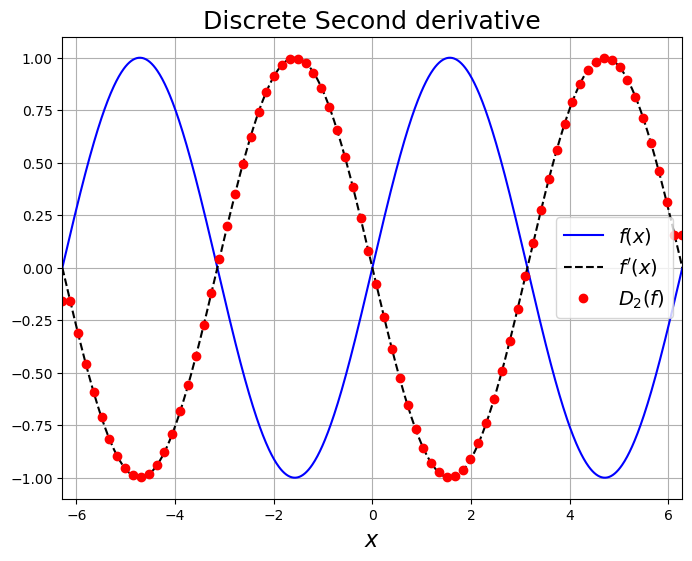

In [14]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

axes.plot(x,f(x),'b',label='$f(x)$')
axes.plot(x, f_dubl_prime(x), 'k--', label="$f'(x)$")
axes.plot(x_hat, D2f, 'ro', label='$D_2(f)$')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.legend(loc='best',fontsize=14)
axes.grid()
axes.set_title('Discrete Second derivative',fontsize=18)
axes.set_xlabel('$x$', fontsize=16)

plt.show()

### The general case

In the general case we can use any $N+1$ points to calculate consistent finite difference coefficients for approximating any derivative of order $k \leq N$.  Relaxing the requirement of equal grid spacing (or the expectation that the location where the derivative is evaluated  $\bar{x}$, is one of the grid points) the Taylor series expansions become


$$\begin{aligned}
    f^{(k)}(\bar{x}) + R(\bar{x}) &= \quad c_0 \left ( f(\bar{x}) + \Delta x_0 f'(\bar{x}) + \frac{\Delta x_0^2}{2!} f''(\bar{x}) + \frac{\Delta x_0^3}{3!} f'''(\bar{x}) + \frac{\Delta x_0^4}{4!} f^{(4)}(\bar{x}) + \mathcal{O}(\Delta x_0^5)\right ) \\
    &+ \quad c_1 \left ( f(\bar{x}) + \Delta x_1 f'(\bar{x}) + \frac{\Delta x_1^2}{2!} f''(\bar{x}) + \frac{\Delta x_1^3}{3!} f'''(\bar{x}) + \frac{\Delta x_1^4}{4!} f^{(4)}(\bar{x}) + \mathcal{O}(\Delta x_1^5)\right )\\
    &+ \quad c_2 \left ( f(\bar{x}) + \Delta x_2 f'(\bar{x}) + \frac{\Delta x_2^2}{2!} f''(\bar{x}) + \frac{\Delta x_2^3}{3!} f'''(\bar{x}) + \frac{\Delta x_2^4}{4!} f^{(4)}(\bar{x}) + \mathcal{O}(\Delta x_2^5)\right ) \\
    &+ \quad \vdots\\
    &+ \quad c_N \left ( f(\bar{x}) + \Delta x_N f'(\bar{x}) + \frac{\Delta x_N^2}{2!} f''(\bar{x}) + \frac{\Delta x_N^3}{3!} f'''(\bar{x}) + \frac{\Delta x_N^4}{4!} f^{(4)}(\bar{x}) + \mathcal{O}(\Delta x_N^5)\right ) \\
\end{aligned}$$
where $\Delta\mathbf{x} = \bar{x} - \mathbf{x}$ is the distance between the point $\bar{x}$ and each grid point.

Equating terms of equal order reduces the problem to another Vandermonde matrix problem
$$\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
\Delta x_0 & \Delta x_1 & \Delta x_2 & \cdots & \Delta x_N\\
\frac{\Delta x_0^2}{2!} & \frac{\Delta x_1^2}{2!} & \frac{\Delta x_2^2}{2!} &\cdots &  \frac{\Delta x_N^2}{2!}\\
 &  & \vdots & \cdots &  \\
\frac{\Delta x_0^N}{N!} & \frac{\Delta x_1^N}{N!} & \frac{\Delta x_2^N}{N!} & \cdots &  \frac{\Delta x_N^N}{N!}\\
\end{bmatrix}
\begin{bmatrix} c_0 \\ c_1\\ c_2 \\ \vdots \\ c_N\\\end{bmatrix} =
\mathbf{b}_k 
$$

where $\mathbf{b}_k$ is a vector of zeros with just a one in the $k$th position for the $k$th derivative.

By exactly accounting for the first $N+1$ terms of the Taylor series (with $N+1$ equations),  we can get any order derivative $0<k<N$ as well as an Error estimate for 

$$R(\bar{x}) = O\left(\frac{\mathbf{c}^T\Delta\mathbf{x}^{N+1}}{(N+1)!}f^{(N+1)}\right) $$

This approach of "undetermined coefficients" can be efficiently coded up as a routine to provide consistent $Nth$ order finite difference coefficients for an arbitrarily spaced grid $\mathbf{x}$.  

Here we present a python version of a matlab routine `fdcoeffV.m` from Randy Leveque's excellent book [Finite Difference Methods for ordinary and partial differential equations](https://faculty.washington.edu/rjl/fdmbook/)



In [15]:
def fdcoeffV(k,xbar,x):
    """
    fdcoeffV routine modified from Leveque (2007) matlab function
    
    Params:
    -------
    
    k: int
        order of derivative
    xbar: float
        point at which derivative is to be evaluated
    x: ndarray
        numpy array of coordinates to use in calculating the weights
    
    Returns:
    --------
    c: ndarray
        array of floats of coefficients.  

    Compute coefficients for finite difference approximation for the
    derivative of order k at xbar based on grid values at points in x.

    WARNING: This approach is numerically unstable for large values of n since
    the Vandermonde matrix is poorly conditioned.  Use fdcoeffF.m instead,
    which is based on Fornberg's method.

     This function returns a row vector c of dimension 1 by n, where n=length(x),
     containing coefficients to approximate u^{(k)}(xbar), 
     the k'th derivative of u evaluated at xbar,  based on n values
     of u at x(1), x(2), ... x(n).  

     If U is an array containing u(x) at these n points, then 
     c.dot(U) will give the approximation to u^{(k)}(xbar).

     Note for k=0 this can be used to evaluate the interpolating polynomial 
     itself.

    Requires len(x) > k.  
    Usually the elements x(i) are monotonically increasing
    and x(1) <= xbar <= x(n), but neither condition is required.
    The x values need not be equally spaced but must be distinct.  
    
    Modified rom  http://www.amath.washington.edu/~rjl/fdmbook/  (2007)
    """
    
    from  scipy.special import factorial

    n = x.shape[0]
    assert  k < n, " The order of the derivative must be less than the stencil width"

    # Generate the Vandermonde matrix from the Taylor series
    A = numpy.ones((n,n))
    xrow = (x - xbar)  # displacements x-xbar 
    for i in range(1,n):
        A[i,:] = (xrow**(i))/factorial(i);
        
    b = numpy.zeros(n)    # b is right hand side,
    b[k] = 1              # so k'th derivative term remains

    c = numpy.linalg.solve(A,b)          # solve n by n system for coefficients
    
    return c


In [16]:
N = 11
x = numpy.linspace(-2*numpy.pi, 2.*numpy.pi, N )
k = 1
scale = (x[1]-x[0])**k

print(fdcoeffV(k,x[0],x[:3])*scale)
for j in range(k,N-1):
    print(fdcoeffV(k,  x[j], x[j-1:j+2])*scale)

print(fdcoeffV(k,x[-1],x[-3:])*scale)

[-1.5  2.  -0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[-0.5  0.   0.5]
[ 0.5 -2.   1.5]


### Example: A variably spaced mesh

In [17]:
N = 21
y = numpy.linspace(-.95, .95,N)
x = numpy.arctanh(y)

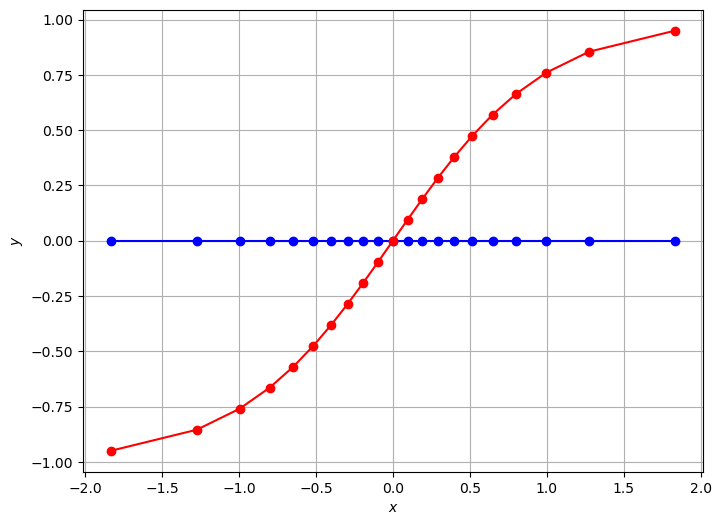

In [18]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x,numpy.zeros(x.shape),'bo-')
axes.plot(x,y,'ro-')
axes.grid()
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
plt.show()

In [19]:
k=1  
fd = fdcoeffV(k,x[0],x[:3])
print('{}, sum={}'.format(fd,fd.sum()))
for j in range(1,N-1):
    fd = fdcoeffV(k,  x[j], x[j-1:j+2])
    print('{}, sum={}'.format(fd,fd.sum()))
fd = fdcoeffV(k,x[-1],x[-3:])
print('{}, sum={}'.format(fd,fd.sum()))


[-2.99107041  5.38832143 -2.39725102], sum=0.0
[-0.59748257 -1.79976846  2.39725102], sum=0.0
[-1.4786644  -1.54760369  3.02626809], sum=0.0
[-2.27379013 -1.34334775  3.61713788], sum=-4.440892098500626e-16
[-2.97889933 -1.14769751  4.12659684], sum=0.0
[-3.59168893 -0.95484098  4.54652991], sum=0.0
[-4.11109435 -0.76316008  4.87425443], sum=0.0
[-4.53657954 -0.57205069  5.10863023], sum=0.0
[-4.86785915 -0.38124048  5.24909963], sum=0.0
[-5.10478308 -0.19058641  5.29536948], sum=0.0
[-5.24728627e+00 -7.61677060e-16  5.24728627e+00], sum=0.0
[-5.29536948  0.19058641  5.10478308], sum=0.0
[-5.24909963  0.38124048  4.86785915], sum=0.0
[-5.10863023  0.57205069  4.53657954], sum=8.881784197001252e-16
[-4.87425443  0.76316008  4.11109435], sum=0.0
[-4.54652991  0.95484098  3.59168893], sum=0.0
[-4.12659684  1.14769751  2.97889933], sum=-4.440892098500626e-16
[-3.61713788  1.34334775  2.27379013], sum=4.440892098500626e-16
[-3.02626809  1.54760369  1.4786644 ], sum=0.0
[-2.39725102  1.79976

### Application to Numerical PDE's

Given an efficent way to generate Finite Difference Coefficients these coefficients can be stored in a (usually sparse) matrix $D_k$ such that  given any discrete vector $\mathbf{f} = f(\mathbf{x})$,  We can calculate the approximate $k$th derivative as simply the matrix vector product

$$
    \mathbf{f}' = D_k\mathbf{f}
$$

This technique will become extremely useful when solving basic finite difference approximations to differential equations (as we will explore in future lectures and homeworks).  

### The Bigger idea

More generally, using finite differences we can transform a continuous differential operator on a function space

$$
    v = \frac{d}{dx} u(x)
$$
which maps a function to a function,  to a discrete linear algebraic problem 

$$
    \mathbf{v} = D\mathbf{u}
$$
where $\mathbf{v}, \mathbf{u}$ are discrete approximations to the continous functions $v,u$ and $D$ is a discrete differential operator (Matrix) which maps a vector to a vector.